In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import nltk

In [ ]:
df = pd.read_csv('/content/Restaurant_Reviews.tsv', delimiter='\t')

In [ ]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [ ]:
df['Review'].values[1]

'Crust is not good.'

In [ ]:
print(df.shape)

(1000, 2)


In [ ]:
df=df.head(500)

In [ ]:
print(df.shape)

(500, 2)


#QUICK EDA

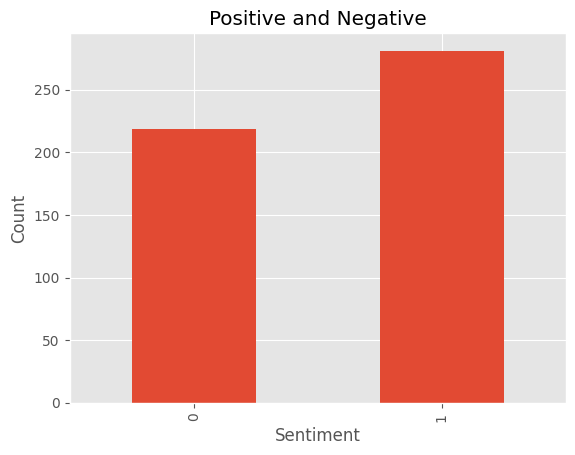

In [ ]:
# Count the number of positive and negative reviews
counts = df['Liked'].value_counts()

# Sort the index (positive and negative) and plot the bar chart
counts.sort_index().plot(kind='bar', title='Positive and Negative')

# Add labels to the x-axis and y-axis
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Display the plot
plt.show()

Basic NLTK

In [ ]:
example=df['Review'].values[50]
print(example)

We ordered the duck rare and it was pink and tender on the inside with a nice char on the outside.


In [ ]:
import nltk

nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
tokens = nltk.word_tokenize(example)
print(tokens)

['We', 'ordered', 'the', 'duck', 'rare', 'and', 'it', 'was', 'pink', 'and', 'tender', 'on', 'the', 'inside', 'with', 'a', 'nice', 'char', 'on', 'the', 'outside', '.']


In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
tagged = nltk.pos_tag(tokens)
print(tagged)

[('We', 'PRP'), ('ordered', 'VBD'), ('the', 'DT'), ('duck', 'NN'), ('rare', 'JJ'), ('and', 'CC'), ('it', 'PRP'), ('was', 'VBD'), ('pink', 'JJ'), ('and', 'CC'), ('tender', 'NN'), ('on', 'IN'), ('the', 'DT'), ('inside', 'NN'), ('with', 'IN'), ('a', 'DT'), ('nice', 'JJ'), ('char', 'NN'), ('on', 'IN'), ('the', 'DT'), ('outside', 'NN'), ('.', '.')]


In [ ]:
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.


True

In [ ]:
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [ ]:
entities=nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  We/PRP
  ordered/VBD
  the/DT
  duck/NN
  rare/JJ
  and/CC
  it/PRP
  was/VBD
  pink/JJ
  and/CC
  tender/NN
  on/IN
  the/DT
  inside/NN
  with/IN
  a/DT
  nice/JJ
  char/NN
  on/IN
  the/DT
  outside/NN
  ./.)


#ROBERTA PRETRAINED MODEL

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 51.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 92.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 75.9 MB/s eta 0:00:00


In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
MODEL = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model=AutoModelForSequenceClassification.from_pretrained(MODEL)

In [ ]:
inputs=tokenizer(example, return_tensors="pt")
print(inputs)

{'input_ids': tensor([[    0,   170,  2740,     5, 15223,  3159,     8,    24,    21,  6907,
             8,  8780,    15,     5,  1025,    19,    10,  2579, 16224,    15,
             5,   751,     4,     2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}


In [ ]:
outputs = model(**inputs)
logits = outputs.logits





In [ ]:
logits = outputs.logits


In [ ]:
probs = softmax(logits.detach().numpy(), axis=1)


In [ ]:
predicted_class = probs.argmax()


In [ ]:
sentiment_labels = ['Negative', 'Neutral', 'Positive']
predicted_label = sentiment_labels[predicted_class]


In [ ]:
print(f"Predicted Sentiment: {predicted_label}, Probability: {probs[0, predicted_class]}")


Predicted Sentiment: Positive, Probability: 0.8507504463195801
